<a href="https://colab.research.google.com/github/PriyanshuRao-code/AI-Lab-Project/blob/riya/team_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Don't do anything here. It's just a setup.
import os
import sys

repo_name = "AI-Lab-Project"
repo_url = "https://github.com/PriyanshuRao-code/AI-Lab-Project.git"
repo_path = f"/content/{repo_name}"

if os.path.exists(repo_path):
    print("Repository already exists at:", repo_path)
else:
    print("🚀 Cloning the repository...")
    os.system(f"git clone {repo_url}")

os.chdir(repo_path)
sys.path.append(repo_path)

print("Repository is ready to use at:", repo_path)

Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project


In [19]:
# Using supporting files (now as .ipynb and later .py)

!pip install import-ipynb
import import_ipynb
from team_24_data_preprocessing import *
from team_24_supervised_learning import *

In [17]:
# Start coding from here

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from itertools import product

In [6]:
df = pd.read_csv('24.csv')

In [7]:
df_train_orig, df_temp = train_test_split(df, test_size=0.4, random_state=42)
df_valid_orig, df_test_orig = train_test_split(df_temp, test_size=0.5, random_state=42)
df_train_orig.reset_index(drop=True, inplace=True)
df_valid_orig.reset_index(drop=True, inplace=True)
df_test_orig.reset_index(drop=True, inplace=True)

In [8]:
outlier_methods = [None, "iqr", "zscore"]
encoding_methods = ["label", "not-onehot"] # will add "onehot" soon...
scaling_methods = ["minmax", "standard"]
correlation_options = [True, False]
pca_options = [True, False]

data_preparation_methods = []

for outlier, encode, scale, correlation, pca in product(outlier_methods, encoding_methods, scaling_methods, correlation_options, pca_options):

    # Skip the unwanted combination
    if pca and (encode == "not-onehot" or encode == "onehot"):
      continue

    data_preparation_methods.append({
        "outlier": outlier,
        "encode": encode,
        "scale": scale,
        "correlation": correlation,
        "pca": pca
    })

In [9]:
models = {
    # "Perceptron": train_model_perceptron,
    # "Logistic Regression": train_model_logistic,
    # "KNN": train_model_knn,
    "Gausian": train_model_gaussian,
    # "SVC": train_model_svc
}

In [10]:
def data_preparation(df_train, df_valid, df_test, method):

    if method['outlier'] == "iqr":
        df_train, df_valid, df_test = remove_outliers_iqr(df_train, df_valid, df_test)
    elif method['outlier'] == "zscore":
        df_train, df_valid, df_test = remove_outliers_zscore(df_train, df_valid, df_test)


    if method['scale'] == "minmax":
        df_train, df_valid, df_test = normalize_minmax(df_train, df_valid, df_test)
    elif method['scale'] == "standard":
        df_train, df_valid, df_test = standardize_data(df_train, df_valid, df_test)


    if method['correlation']:
        df_train, df_valid, df_test = remove_highly_correlated(df_train, df_valid, df_test)


    if method['encode'] == "label":
        df_train, df_valid, df_test = label_encode_categorical(df_train, df_valid, df_test)
    elif method['encode'] == "not-onehot":
        df_train, df_valid, df_test = process_splits(df_train, df_valid, df_test, one_hot_encode_month=False)
    elif method['encode'] == "onehot":
        df_train, df_valid, df_test = process_splits(df_train, df_valid, df_test, one_hot_encode_month=True)

    if method['pca']:
        df_train, df_valid, df_test = perform_pca(df_train, df_valid, df_test)

    return df_train, df_valid, df_test

In [11]:
def evaluate_model(y_true, y_pred):

    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1_score": f1_score(y_true, y_pred, zero_division=0)
    }

In [12]:
results = []

for method in data_preparation_methods:
    df_train, df_valid, df_test = data_preparation(df_train_orig.copy(), df_valid_orig.copy(), df_test_orig.copy(), method)

    for model_name, model_func in models.items():
        model, y_valid, y_test, y_valid_pred, y_test_pred = model_func(df_train, df_valid, df_test)

        metrics_valid = evaluate_model(y_valid, y_valid_pred)
        metrics_test = evaluate_model(y_test, y_test_pred)

        results.append({
            "data_preprocessing_methods": method,
            "model": model_name,
            "valid": metrics_valid,
            "test": metrics_test
        })

# Converting into dataframe
df_results = pd.json_normalize(results, sep='_')

In [13]:
df_results

,model,data_preprocessing_methods_outlier,data_preprocessing_methods_encode,data_preprocessing_methods_scale,data_preprocessing_methods_correlation,data_preprocessing_methods_pca,valid_accuracy,valid_precision,valid_recall,valid_f1_score,test_accuracy,test_precision,test_recall,test_f1_score
0,Gausian,None,label,minmax,True,True,0.835646,0.000000,0.000000,0.000000,0.847548,0.000000,0.000000,0.000000
1,Gausian,None,label,minmax,True,False,0.937033,0.818792,0.792208,0.805281,0.929638,0.772059,0.750000,0.760870
2,Gausian,None,label,minmax,False,True,0.835646,0.000000,0.000000,0.000000,0.850746,0.000000,0.000000,0.000000
3,Gausian,None,label,minmax,False,False,0.911419,0.691892,0.831169,0.755162,0.911514,0.662857,0.828571,0.736508
4,Gausian,None,label,standard,True,True,0.835646,0.000000,0.000000,0.000000,0.850746,0.000000,0.000000,0.000000
5,Gausian,None,label,standard,True,False,0.944504,0.854167,0.798701,0.825503,0.934968,0.796992,0.757143,0.776557
6,Gausian,None,label,standard,False,True,0.835646,0.000000,0.000000,0.000000,0.850746,0.000000,0.000000,0.000000
7,Gausian,None,label,standard,False,False,0.922092,0.723757,0.850649,0.782090,0.923241,0.707317,0.828571,0.763158
8,Gausian,None,not-onehot,minmax,True,False,0.940235,0.822368,0.811688,0.816993,0.943497,0.817518,0.800000,0.808664
9,Gausian,None,not-onehot,minmax,False,False,0.918890,0.707447,0.863636,0.777778,0.926439,0.712575,0.850000,0.775244


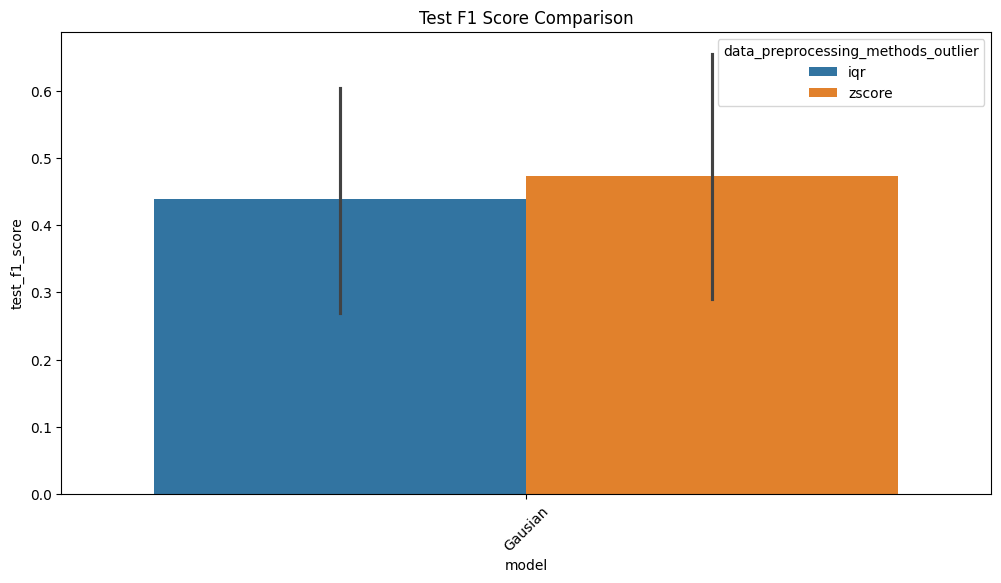

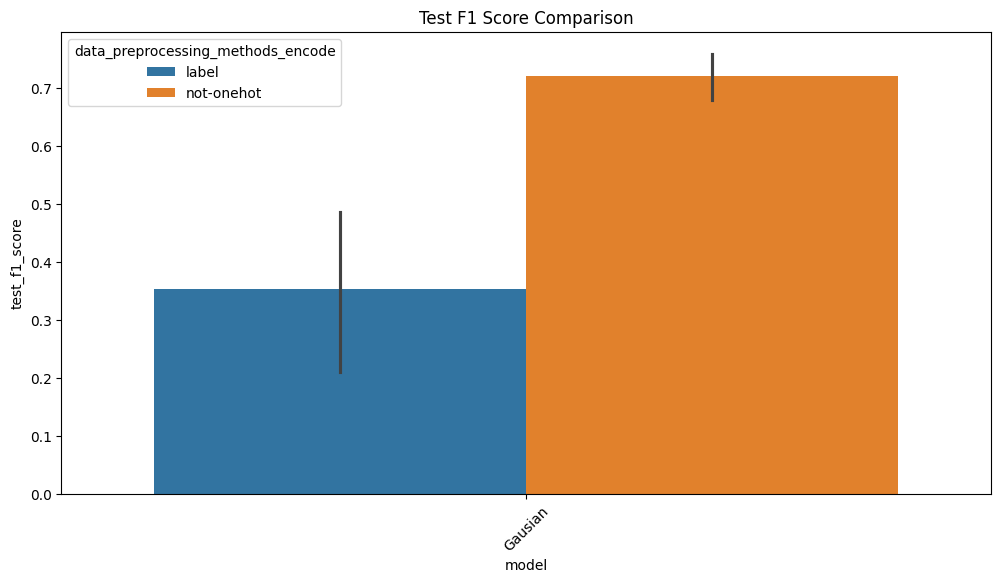

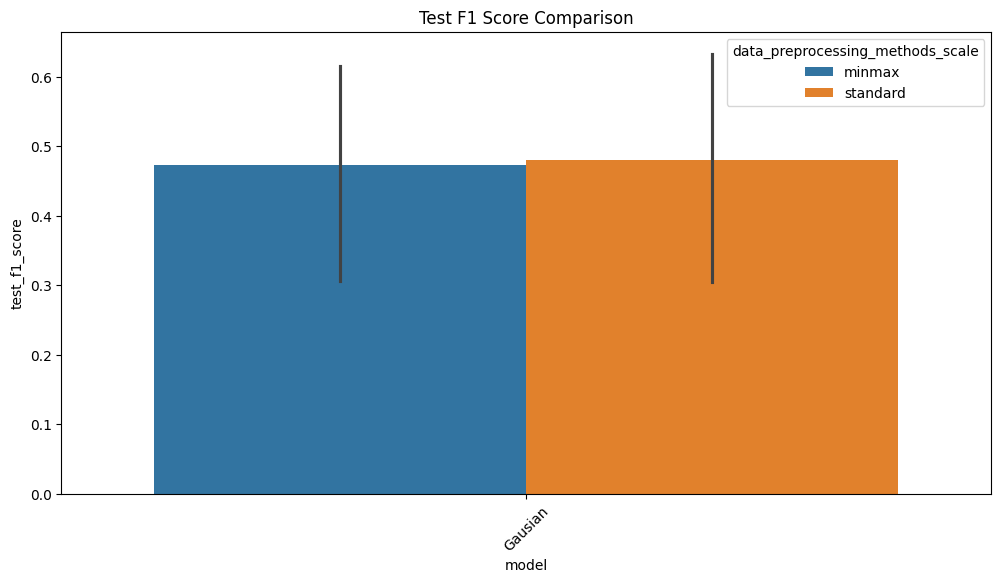

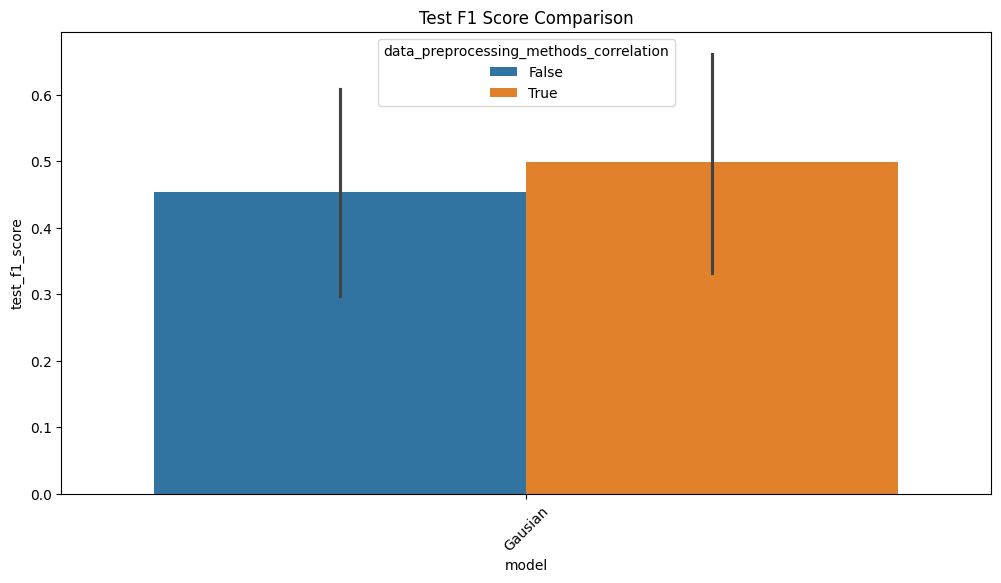

In [14]:
# Bar Plot


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_f1_score', hue='data_preprocessing_methods_outlier')
plt.xticks(rotation=45)
plt.title("Test F1 Score Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_f1_score', hue='data_preprocessing_methods_encode')
plt.xticks(rotation=45)
plt.title("Test F1 Score Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_f1_score', hue='data_preprocessing_methods_scale')
plt.xticks(rotation=45)
plt.title("Test F1 Score Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_f1_score', hue='data_preprocessing_methods_correlation')
plt.xticks(rotation=45)
plt.title("Test F1 Score Comparison")
plt.show()

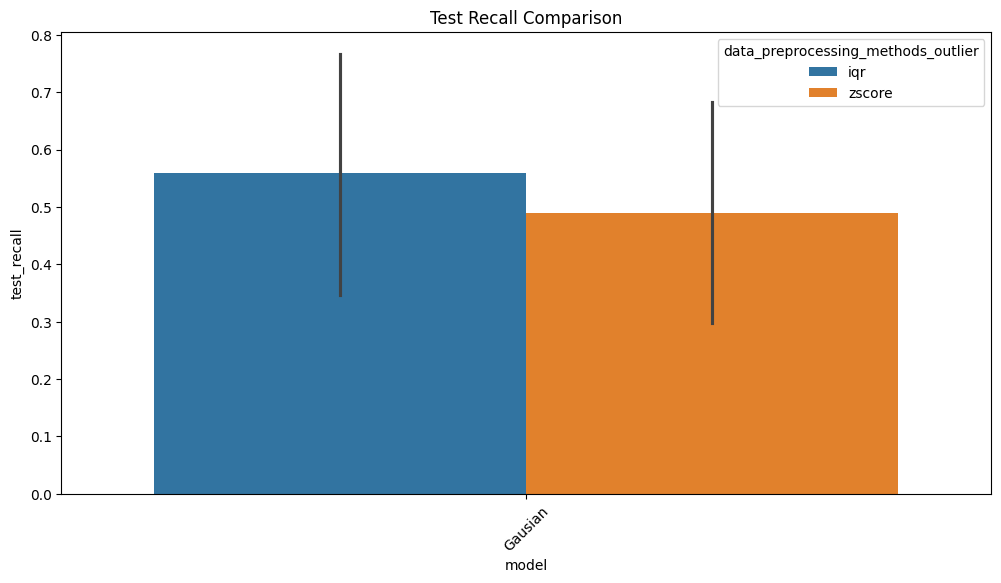

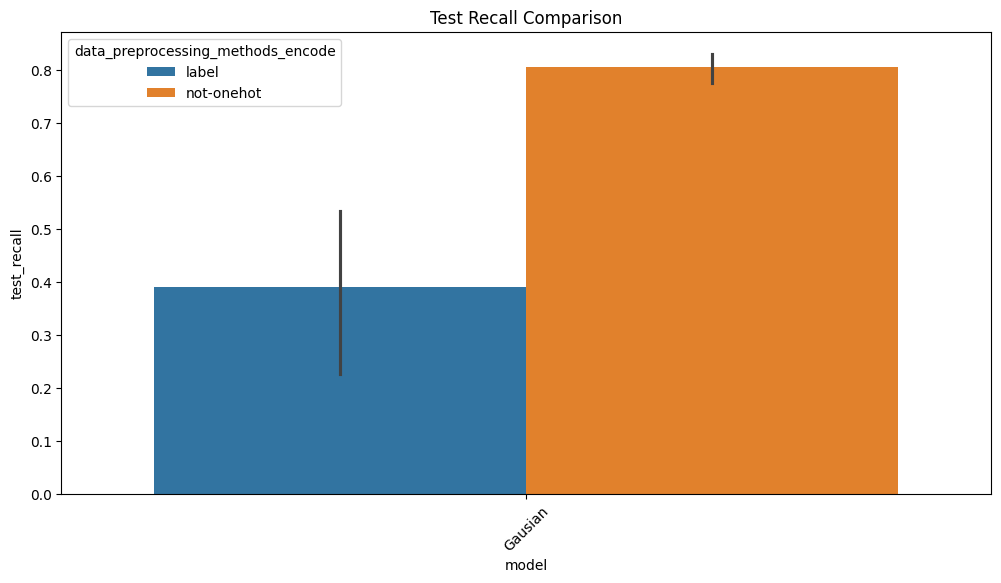

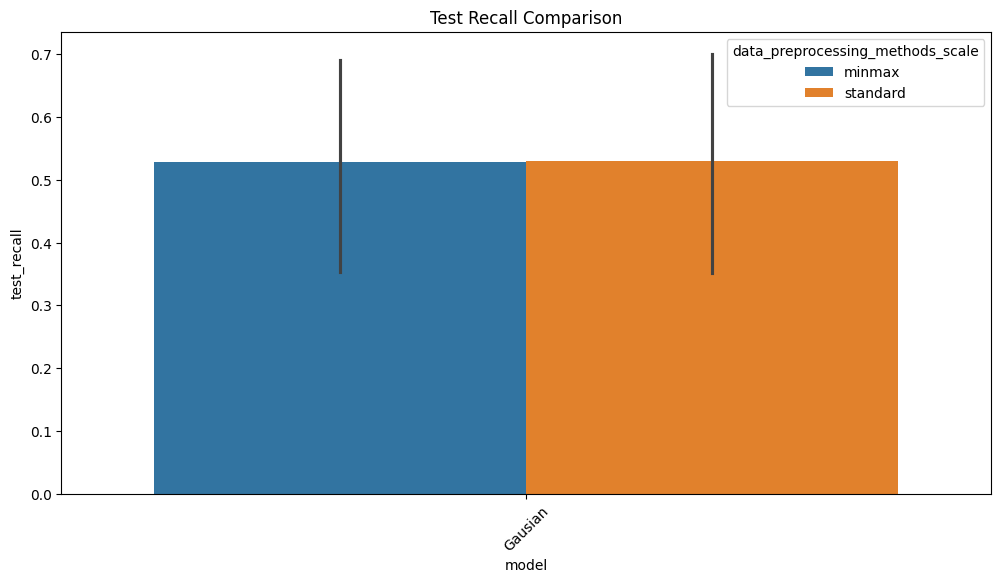

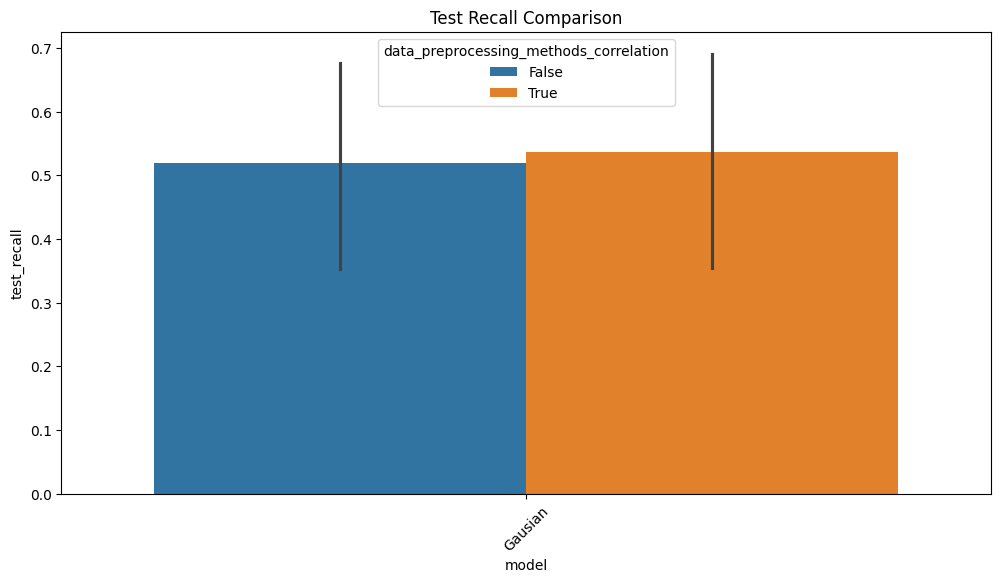

In [ ]:
# Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_recall', hue='data_preprocessing_methods_outlier')
plt.xticks(rotation=45)
plt.title("Test Recall Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_recall', hue='data_preprocessing_methods_encode')
plt.xticks(rotation=45)
plt.title("Test Recall Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_recall', hue='data_preprocessing_methods_scale')
plt.xticks(rotation=45)
plt.title("Test Recall Comparison")
plt.show()



plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_recall', hue='data_preprocessing_methods_correlation')
plt.xticks(rotation=45)
plt.title("Test Recall Comparison")
plt.show()

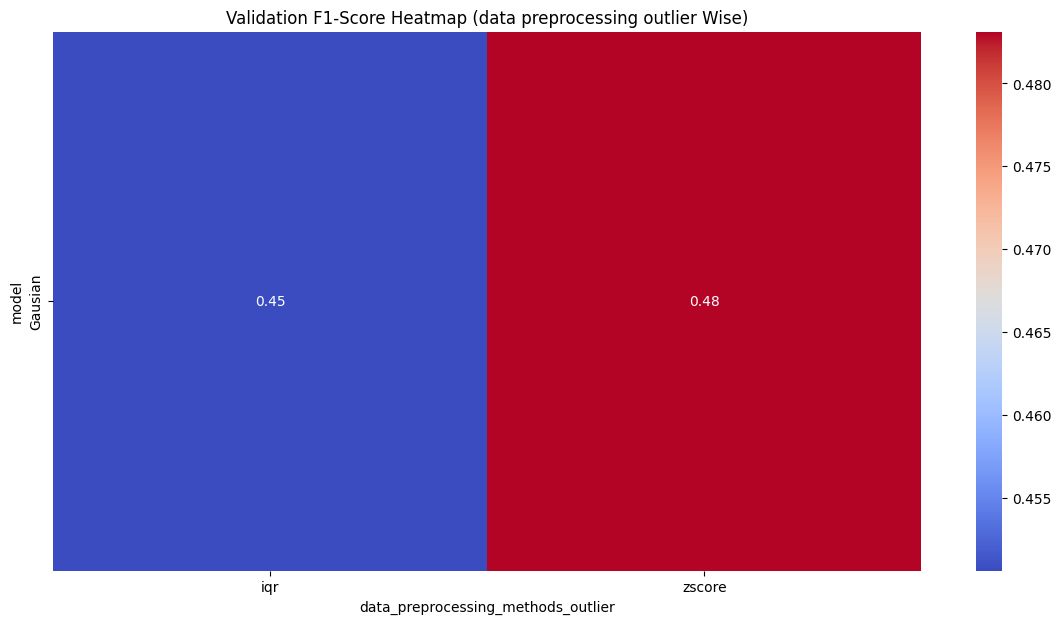

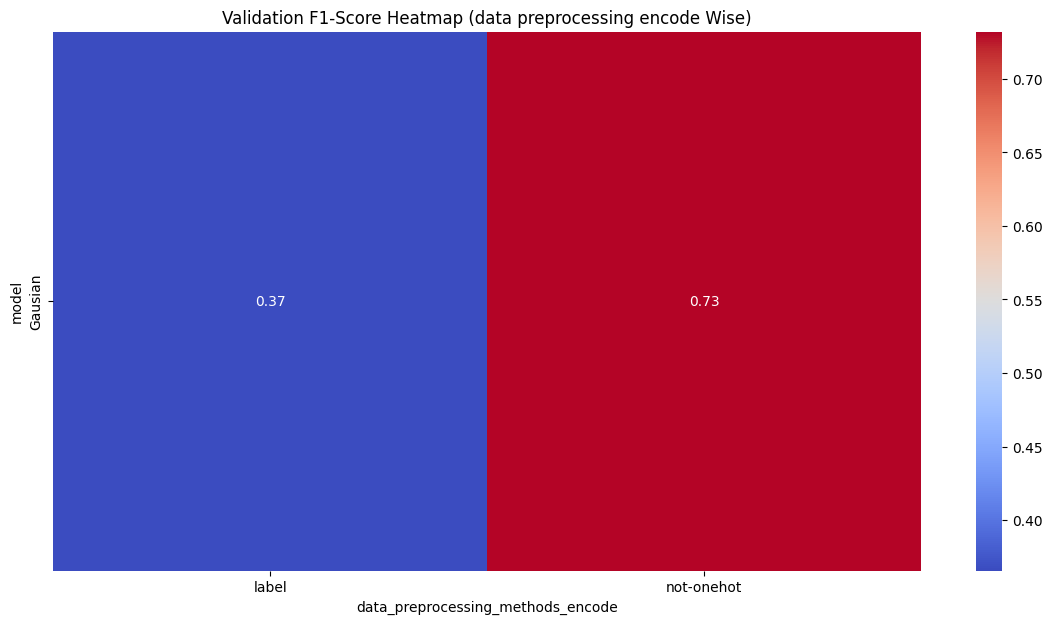

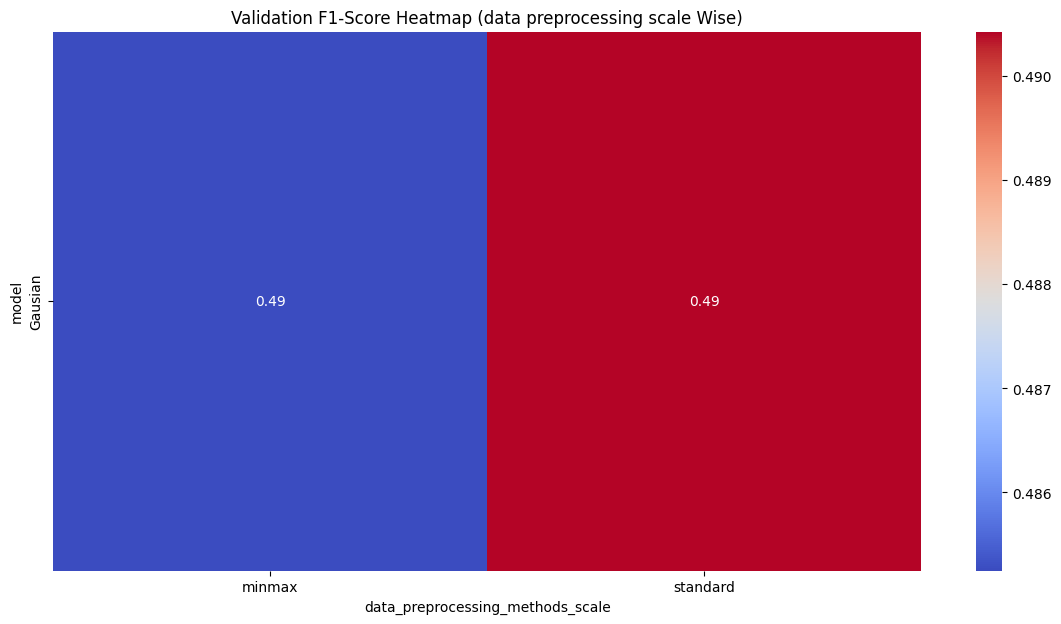

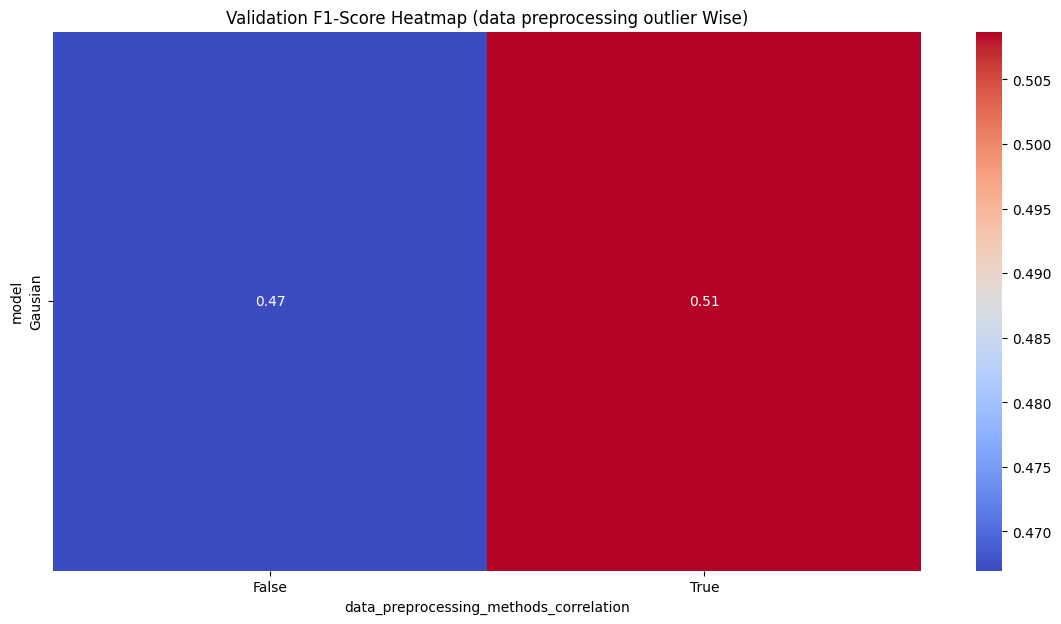

In [ ]:
# Heatmap

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_outlier', values='valid_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Validation F1-Score Heatmap (data preprocessing outlier Wise)")
plt.show()


pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_encode', values='valid_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Validation F1-Score Heatmap (data preprocessing encode Wise)")
plt.show()

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_scale', values='valid_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Validation F1-Score Heatmap (data preprocessing scale Wise)")
plt.show()

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_correlation', values='valid_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Validation F1-Score Heatmap (data preprocessing outlier Wise)")
plt.show()

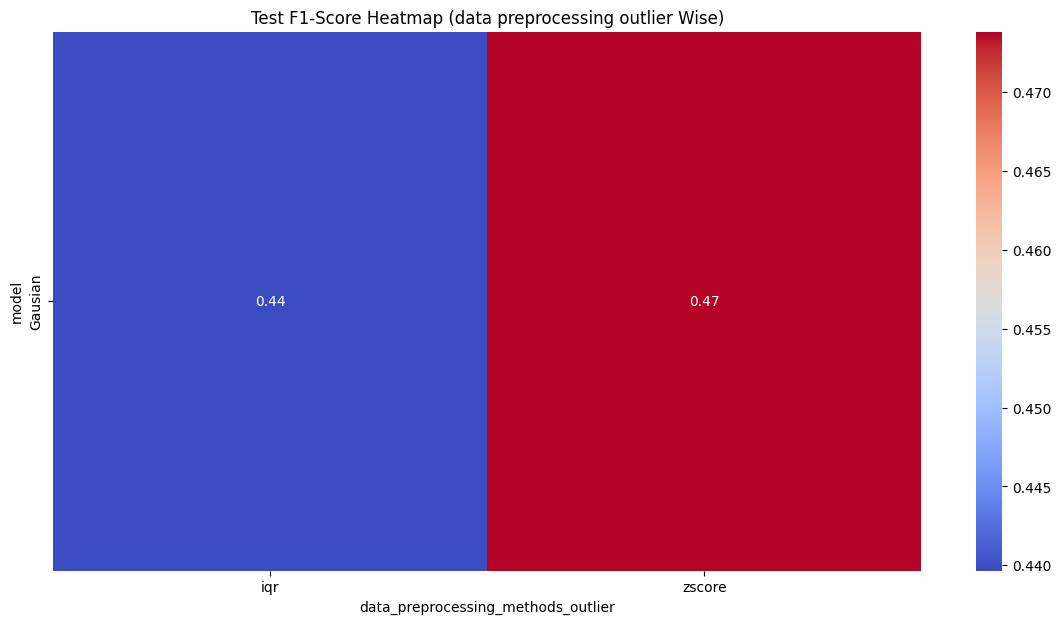

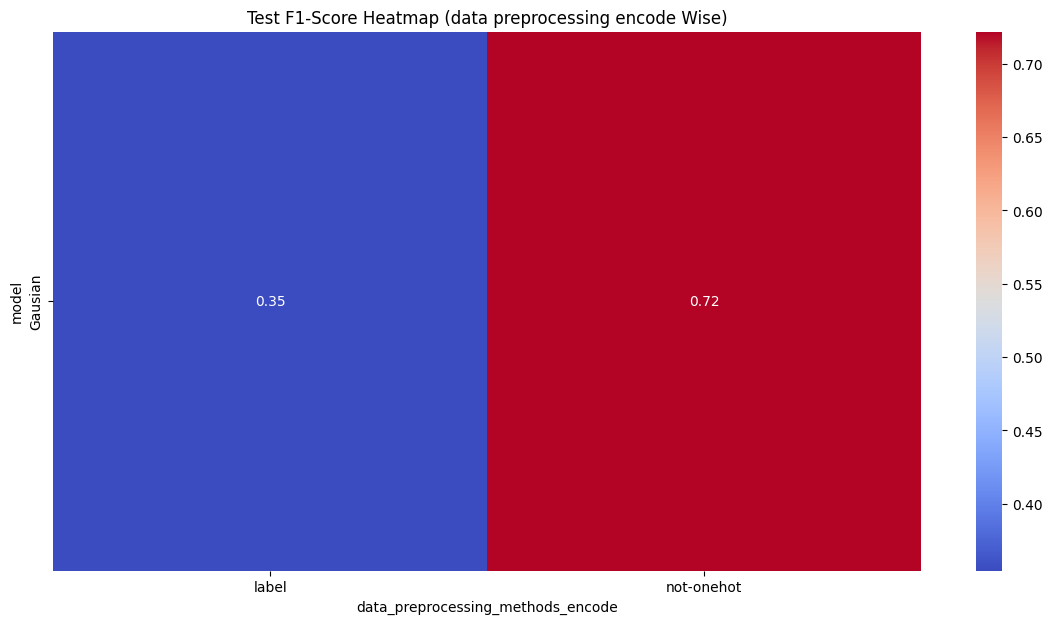

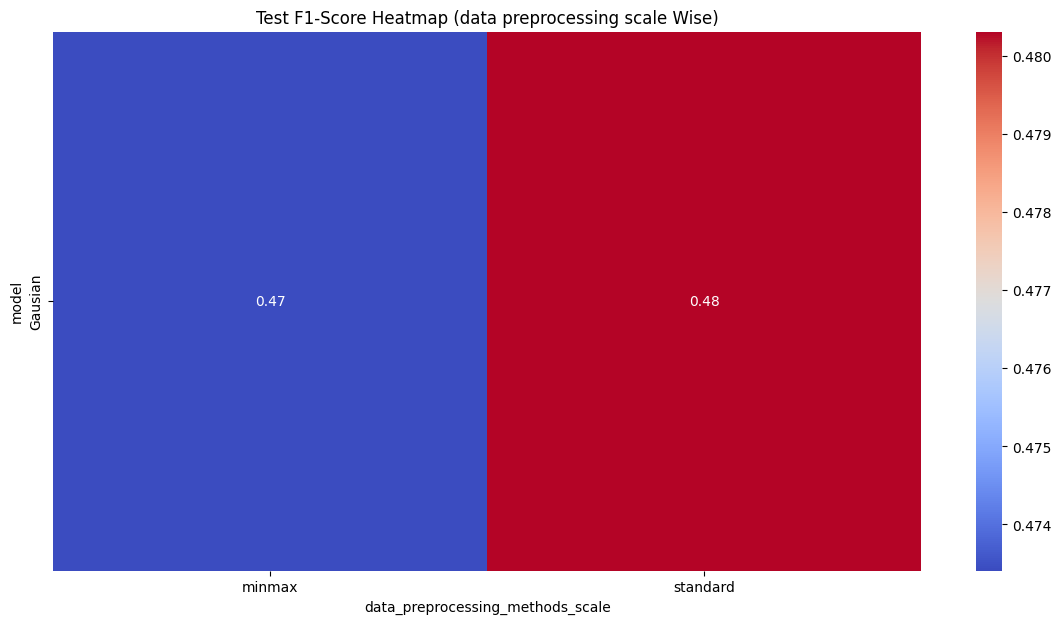

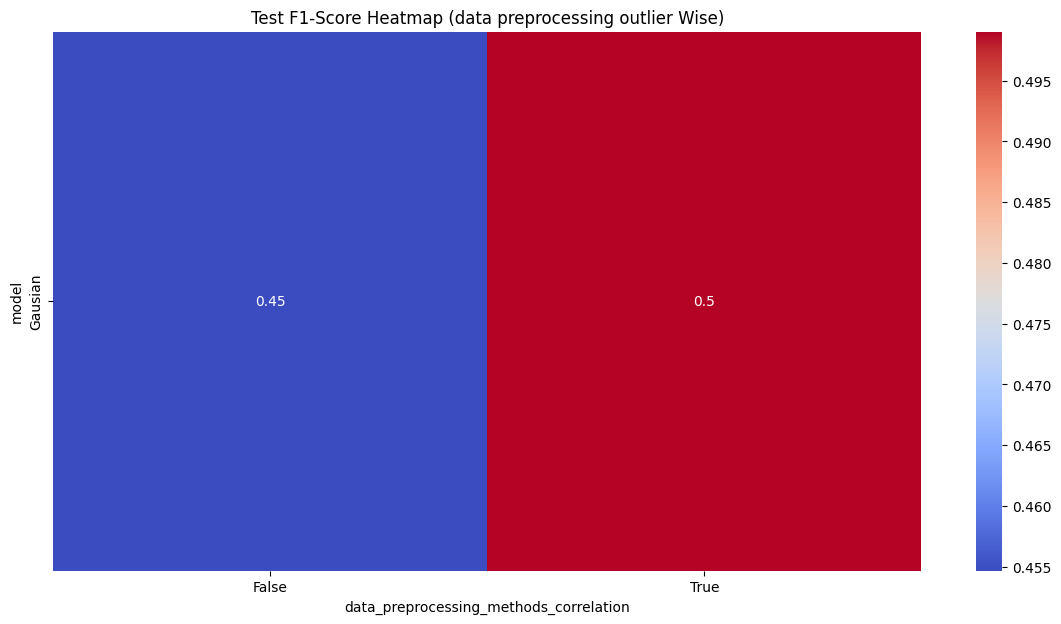

In [ ]:
# Heatmap

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_outlier', values='test_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Test F1-Score Heatmap (data preprocessing outlier Wise)")
plt.show()


pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_encode', values='test_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Test F1-Score Heatmap (data preprocessing encode Wise)")
plt.show()

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_scale', values='test_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Test F1-Score Heatmap (data preprocessing scale Wise)")
plt.show()

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_correlation', values='test_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Test F1-Score Heatmap (data preprocessing outlier Wise)")
plt.show()

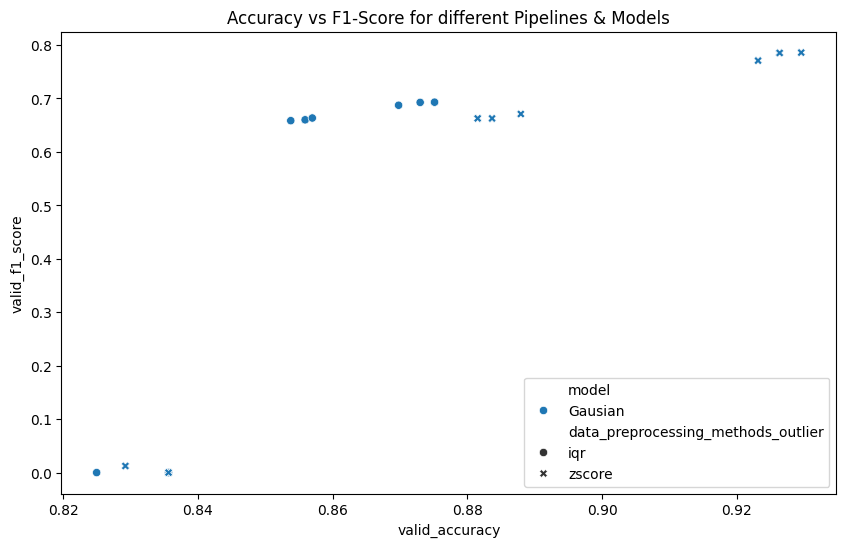

In [ ]:
# Scatter Plot


plt.figure(figsize=(10,6))
sns.scatterplot(data=df_results, x='valid_accuracy', y='valid_f1_score', hue='model', style='data_preprocessing_methods_outlier')
plt.title("Accuracy vs F1-Score for different Pipelines & Models")
plt.show()

In [21]:
from team_24_supervised_learning import get_perceptron_losses

ImportError: cannot import name 'get_perceptron_losses' from 'team_24_supervised_learning' (unknown location)

In [ ]:
losses = get_perceptron_losses(df_train, df_valid, df_test)
plt.plot(range(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.show()
